In [3]:
#GitHub https://github.com/dqswordman/MUT_Neural_Networks_LAB/blob/main/Du_Hw.ipynb
''' 
dont run this part in jupyter!!!! broken the page
python code to add random data

import pandas as pd
import numpy as np

# Load original data set
file_path = './Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Create a new dataframe with 200 values ​​per column randomly drawn from the original dataset
new_rows = pd.DataFrame({col: np.random.choice(data[col], size=200, replace=True) for col in data.columns})

# Add the newly generated 200 pieces of data to the original data set
augmented_data = pd.concat([data, new_rows], ignore_index=True)

# Save the dataset after adding new data
augmented_file_path = './augmented_data_with_200_rows.csv'
augmented_data.to_csv(augmented_file_path, index=False)


!!!!!!!!by the way  from here to next note part  all dataset I used is wrong because I use "random" in lable ...!!!!!!!

'''

" \ndont run this part in jupyter!!!! broken the page\npython code to add random data\n\nimport pandas as pd\nimport numpy as np\n\n# 加载原始数据集\nfile_path = './Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'\ndata = pd.read_csv(file_path)\n\n# 创建一个新的数据框，每列从原始数据集中随机抽取200个值\nnew_rows = pd.DataFrame({col: np.random.choice(data[col], size=200, replace=True) for col in data.columns})\n\n# 将新生成的200条数据添加到原始数据集中\naugmented_data = pd.concat([data, new_rows], ignore_index=True)\n\n# 保存添加新数据后的数据集\naugmented_file_path = './augmented_data_with_200_rows.csv'\naugmented_data.to_csv(augmented_file_path, index=False)\n\n"

In [5]:
#增加数据后内容
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
#新增数据  需要更换内容 不使用此代码
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 读取数据
df = pd.read_csv('./augmented_data_with_200_rows.csv')

# 去除列名中的前后空格
df.columns = df.columns.str.strip()

# 检查数据概况
print("数据集信息:")
print(df.info())

# 显示数据的前几行，便于了解数据内容
print("数据预览:")
print(df.head())

# 检查是否有缺失值
print("每列的缺失值统计:")
print(df.isnull().sum())

# 处理缺失值（如果有缺失值，我们用均值填充数值型特征）
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# 检查数据中的无穷大和非常大的值
print("检查无穷大和非常大的值:")
for col in numeric_features:
    if np.isinf(df[col]).any():
        print(f"列 '{col}' 包含无穷大值。")
    if (df[col] > np.finfo(np.float64).max).any():
        print(f"列 '{col}' 包含超出 float64 范围的值。")

# 将无穷大和非常大的值替换为列的均值
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# 提取特征和标签
if 'Label' in df.columns:
    X = df.drop('Label', axis=1).values  # 假设 'Label' 列是目标变量
    y = df['Label'].values
else:
    raise ValueError("数据集中未找到 'Label' 列，请检查列名或数据结构。")

# 将分类标签转换为数值编码（假设 'Label' 是分类变量）
le = LabelEncoder()
y = le.fit_transform(y)

# 数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225945 entries, 0 to 225944
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225945 non-null  int64  
 1   Flow Duration                225945 non-null  int64  
 2   Total Fwd Packets            225945 non-null  int64  
 3   Total Backward Packets       225945 non-null  int64  
 4   Total Length of Fwd Packets  225945 non-null  int64  
 5   Total Length of Bwd Packets  225945 non-null  int64  
 6   Fwd Packet Length Max        225945 non-null  int64  
 7   Fwd Packet Length Min        225945 non-null  int64  
 8   Fwd Packet Length Mean       225945 non-null  float64
 9   Fwd Packet Length Std        225945 non-null  float64
 10  Bwd Packet Length Max        225945 non-null  int64  
 11  Bwd Packet Length Min        225945 non-null  int64  
 12  Bwd Packet Length Mean       225945 non-null  float

In [8]:
# 提取特征和标签
if 'Label' in df.columns:
    X = df.drop('Label', axis=1).values  # 假设 'Label' 列是目标变量
    y = df['Label'].values
else:
    raise ValueError("数据集中未找到 'Label' 列，请检查列名或数据结构。")

# 将分类标签转换为数值编码（假设 'Label' 是分类变量）
le = LabelEncoder()
y = le.fit_transform(y)


In [11]:
# 数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
# 构建ANN模型 original model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 假设是二分类问题

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4519/4519 ━━━━━━━━━━━━━━━━━━━━ 4s 718us/step - accuracy: 0.9711 - loss: 0.0876 - val_accuracy: 0.9983 - val_loss: 0.0080
Epoch 2/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 697us/step - accuracy: 0.9980 - loss: 0.0132 - val_accuracy: 0.9989 - val_loss: 0.0067
Epoch 3/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 714us/step - accuracy: 0.9983 - loss: 0.0104 - val_accuracy: 0.9989 - val_loss: 0.0070
Epoch 4/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 669us/step - accuracy: 0.9984 - loss: 0.0086 - val_accuracy: 0.9989 - val_loss: 0.0062
Epoch 5/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 705us/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.9989 - val_loss: 0.0068
Epoch 6/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 660us/step - accuracy: 0.9984 - loss: 0.0085 - val_accuracy: 0.9989 - val_loss: 0.0071
Epoch 7/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 691us/step - accuracy: 0.9985 - loss: 0.0107 - val_accuracy: 0.9989 - val_loss: 0.0079
Epoch 8/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 708us/step - accuracy: 0.9985 - loss: 0.00

In [47]:
# 模型评估
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 打印分类报告和混淆矩阵
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1413/1413 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19617
           1       1.00      1.00      1.00     25572

    accuracy                           1.00     45189
   macro avg       1.00      1.00      1.00     45189
weighted avg       1.00      1.00      1.00     45189

[[19597    20]
 [   14 25558]]


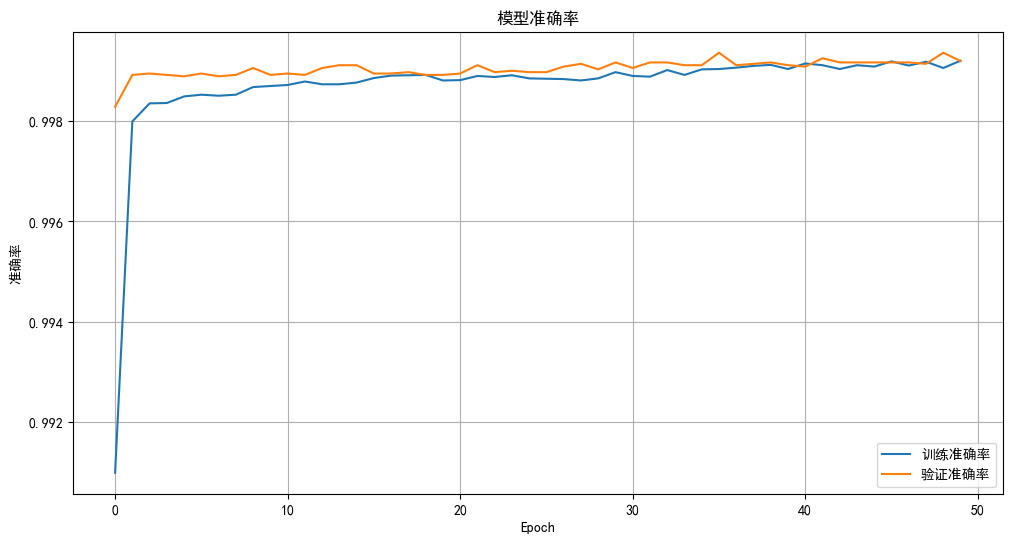

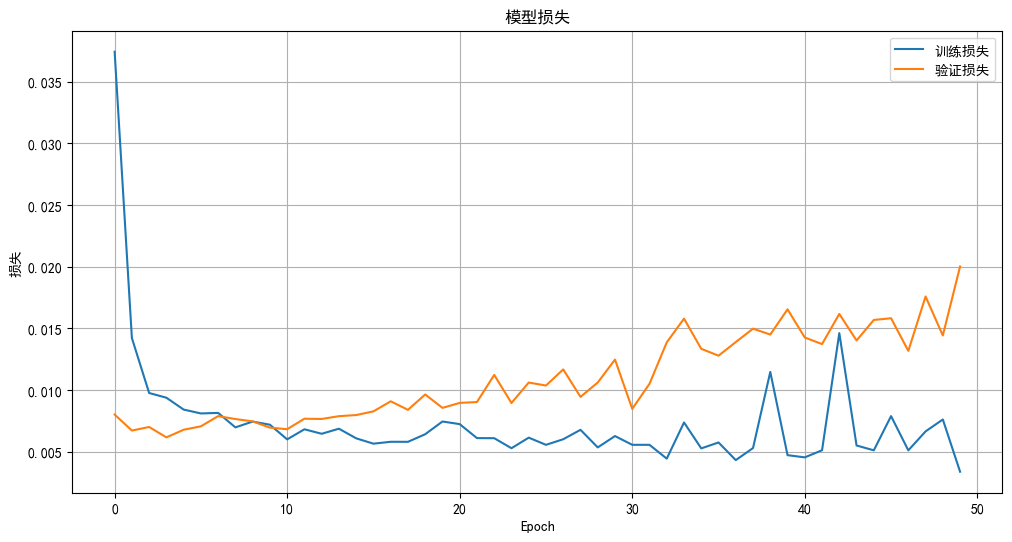

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体为SimHei（黑体），以便正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制训练和验证的准确率变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('模型准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
plt.show()

# 绘制训练和验证的损失变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
plt.show()


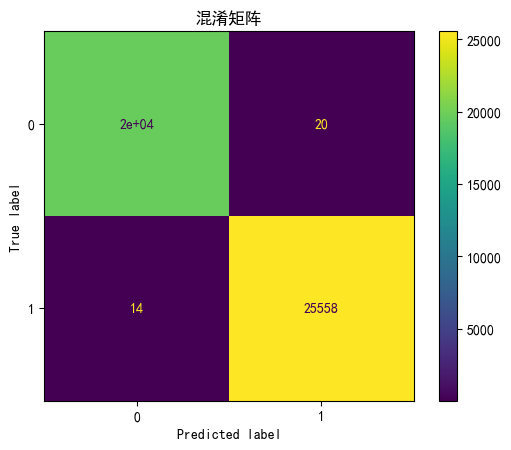

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

# 绘制混淆矩阵
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('混淆矩阵')
plt.show()


In [ ]:
#change new model 

In [53]:
#change 1
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 构建增加隐藏层的ANN模型
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(48, activation='relu'))  # 新增的隐藏层，48个神经元
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 假设是二分类问题

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4519/4519 ━━━━━━━━━━━━━━━━━━━━ 4s 731us/step - accuracy: 0.9558 - loss: 0.1183 - val_accuracy: 0.9989 - val_loss: 0.0078
Epoch 2/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 714us/step - accuracy: 0.9974 - loss: 0.0155 - val_accuracy: 0.9989 - val_loss: 0.0064
Epoch 3/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 701us/step - accuracy: 0.9981 - loss: 0.0104 - val_accuracy: 0.9988 - val_loss: 0.0068
Epoch 4/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 733us/step - accuracy: 0.9980 - loss: 0.0107 - val_accuracy: 0.9986 - val_loss: 0.0063
Epoch 5/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 724us/step - accuracy: 0.9982 - loss: 0.0103 - val_accuracy: 0.9989 - val_loss: 0.0068
Epoch 6/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 727us/step - accuracy: 0.9983 - loss: 0.0100 - val_accuracy: 0.9988 - val_loss: 0.0056
Epoch 7/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 742us/step - accuracy: 0.9986 - loss: 0.0079 - val_accuracy: 0.9989 - val_loss: 0.0068
Epoch 8/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 692us/step - accuracy: 0.9984 - loss: 0.00

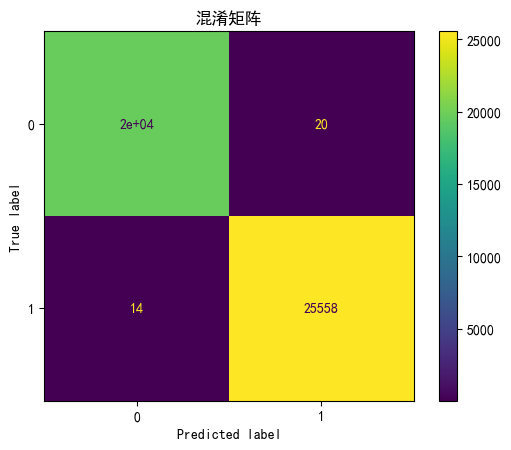

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

# 绘制混淆矩阵
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('混淆矩阵')
plt.show()


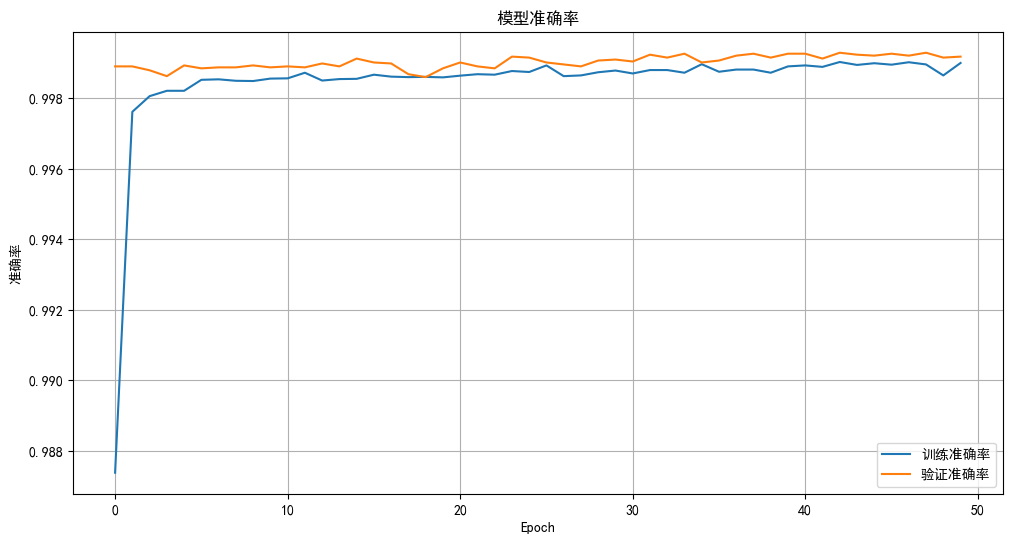

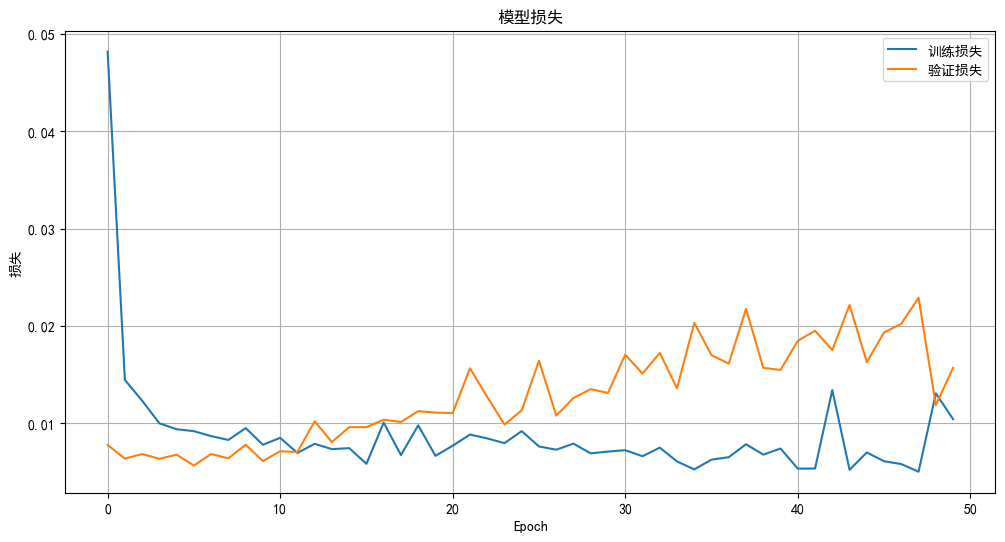

In [57]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体为SimHei（黑体），以便正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制训练和验证的准确率变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('模型准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
plt.show()

# 绘制训练和验证的损失变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#use best model I found in report_part_3

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 构建新的ANN模型
model = Sequential()

# 第一层：288个神经元，激活函数为sigmoid
model.add(Dense(288, input_dim=X_train.shape[1], activation='sigmoid'))

# 第二层：64个神经元，激活函数为relu
model.add(Dense(64, activation='relu'))

# 输出层：1个神经元，激活函数为sigmoid（用于二分类问题）
model.add(Dense(1, activation='sigmoid'))

# 编译模型，优化器为adam，损失函数为binary_crossentropy，评估指标为accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4519/4519 ━━━━━━━━━━━━━━━━━━━━ 4s 687us/step - accuracy: 0.9822 - loss: 0.0554 - val_accuracy: 0.9987 - val_loss: 0.0073
Epoch 2/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 688us/step - accuracy: 0.9980 - loss: 0.0090 - val_accuracy: 0.9989 - val_loss: 0.0061
Epoch 3/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 670us/step - accuracy: 0.9984 - loss: 0.0064 - val_accuracy: 0.9989 - val_loss: 0.0057
Epoch 4/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 678us/step - accuracy: 0.9986 - loss: 0.0054 - val_accuracy: 0.9991 - val_loss: 0.0058
Epoch 5/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 685us/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 6/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 651us/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9989 - val_loss: 0.0045
Epoch 7/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 683us/step - accuracy: 0.9989 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0046
Epoch 8/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 686us/step - accuracy: 0.9992 - loss: 0.00

In [61]:
# 模型评估
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 打印分类报告和混淆矩阵
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1413/1413 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19617
           1       1.00      1.00      1.00     25572

    accuracy                           1.00     45189
   macro avg       1.00      1.00      1.00     45189
weighted avg       1.00      1.00      1.00     45189

[[19596    21]
 [   14 25558]]


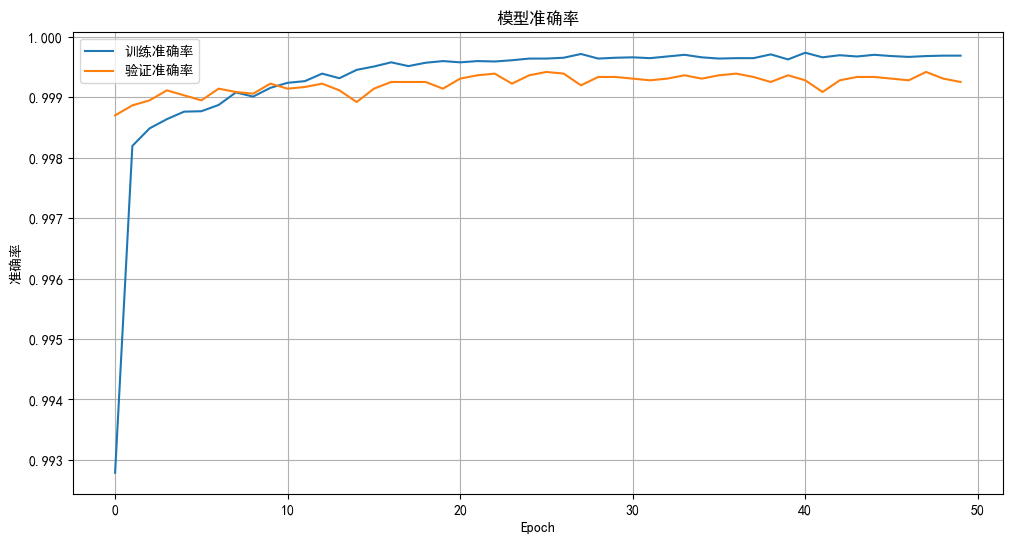

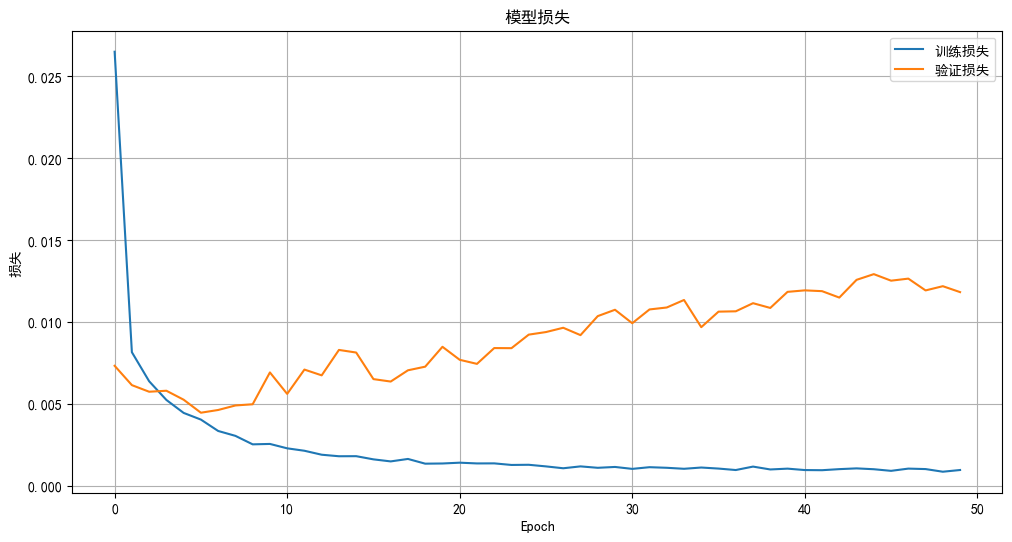

In [63]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体为SimHei（黑体），以便正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制训练和验证的准确率变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('模型准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
plt.show()

# 绘制训练和验证的损失变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
plt.show()


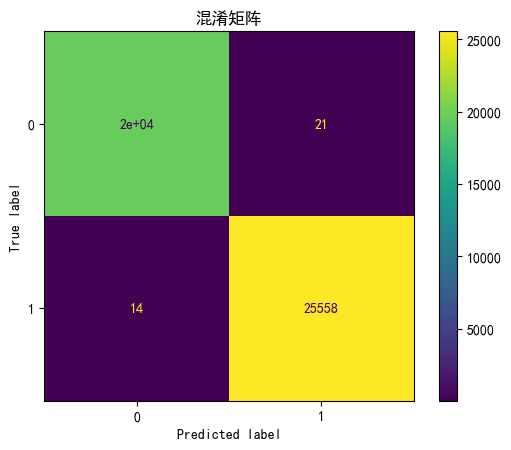

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

# 绘制混淆矩阵
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('混淆矩阵')
plt.show()


In [ ]:
'''
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

# 构建新的ANN模型
def build_optimized_model(input_shape):
    model = Sequential()

    # 第一层：288个神经元，激活函数为sigmoid，减少正则化强度
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(288, activation='sigmoid', kernel_regularizer=l2(0.0001)))  # 减小L2正则化
    model.add(BatchNormalization())  # 批量归一化
    model.add(Dropout(0.3))  # Dropout 减少为 0.3

    # 第二层：64个神经元，激活函数为relu
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))  # 减小L2正则化
    model.add(BatchNormalization())  # 批量归一化
    model.add(Dropout(0.3))  # Dropout 减少为 0.3

    # 输出层：1个神经元，激活函数为sigmoid（用于二分类问题）
    model.add(Dense(1, activation='sigmoid'))

    # 编译模型，使用Adam优化器，调整学习率
    optimizer = Adam(learning_rate=0.0001)  # 调整学习率
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# 使用 ReduceLROnPlateau 动态调整学习率
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# 定义早停机制（增加 patience）
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# 构建模型
model = build_optimized_model(X_train.shape[1])

# 训练模型
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])
'''

In [ ]:
------------------------------------------------------------

In [ ]:
'''
It looks like either overfitting or underfitting.I already tried all the methods to save the best model as you can see the one above this
I thought about all the possibilities but couldn't understand why the data was worse with a better model, 
until I realized that I also used random for "label" ...
So funny 
so I do all again 
'''

In [ ]:
--------------------------------------------------------------------

In [ ]:
#start here 

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read data
df = pd.read_csv('./corrected_augmented_data.csv')

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Check data overview
print("数据集信息:")
print(df.info())

# Display the first few rows of data to make it easier to understand the data content
print("数据预览:")
print(df.head())

# Check for missing values
print("每列的缺失值统计:")
print(df.isnull().sum())

# Handle missing values ​​(if there are missing values, we fill numeric features with the mean)
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Check for infinities and very large values ​​in your data
print("检查无穷大和非常大的值:")
for col in numeric_features:
    if np.isinf(df[col]).any():
        print(f"列 '{col}' 包含无穷大值。")
    if (df[col] > np.finfo(np.float64).max).any():
        print(f"列 '{col}' 包含超出 float64 范围的值。")

# Replace infinity and very large values ​​with the mean of the column
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Extract features and labels
if 'Label' in df.columns:
    X = df.drop('Label', axis=1).values  # 假设 'Label' 列是目标变量
    y = df['Label'].values
else:
    raise ValueError("数据集中未找到 'Label' 列，请检查列名或数据结构。")

# Convert categorical labels to numerical encodings (assuming 'Label' is a categorical variable)
le = LabelEncoder()
y = le.fit_transform(y)

# The data set is split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225945 entries, 0 to 225944
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225945 non-null  int64  
 1   Flow Duration                225945 non-null  int64  
 2   Total Fwd Packets            225945 non-null  int64  
 3   Total Backward Packets       225945 non-null  int64  
 4   Total Length of Fwd Packets  225945 non-null  int64  
 5   Total Length of Bwd Packets  225945 non-null  int64  
 6   Fwd Packet Length Max        225945 non-null  int64  
 7   Fwd Packet Length Min        225945 non-null  int64  
 8   Fwd Packet Length Mean       225945 non-null  float64
 9   Fwd Packet Length Std        225945 non-null  float64
 10  Bwd Packet Length Max        225945 non-null  int64  
 11  Bwd Packet Length Min        225945 non-null  int64  
 12  Bwd Packet Length Mean       225945 non-null  float

In [29]:
# Extract features and labels
if 'Label' in df.columns:
    X = df.drop('Label', axis=1).values  Assume the 'Label' column is the target variable
    y = df['Label'].values
else:
    raise ValueError("'Label' column not found in dataset, please check column name or data structure.")

# Convert categorical labels to numerical encodings (assuming 'Label' is a categorical variable)
le = LabelEncoder()
y = le.fit_transform(y)


In [31]:
# Split the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # It is a two-classification problem

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4519/4519 ━━━━━━━━━━━━━━━━━━━━ 4s 658us/step - accuracy: 0.9690 - loss: 0.0859 - val_accuracy: 0.9988 - val_loss: 0.0065
Epoch 2/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 668us/step - accuracy: 0.9981 - loss: 0.0113 - val_accuracy: 0.9991 - val_loss: 0.0057
Epoch 3/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 671us/step - accuracy: 0.9981 - loss: 0.0090 - val_accuracy: 0.9991 - val_loss: 0.0064
Epoch 4/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 666us/step - accuracy: 0.9985 - loss: 0.0072 - val_accuracy: 0.9991 - val_loss: 0.0063
Epoch 5/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 712us/step - accuracy: 0.9988 - loss: 0.0069 - val_accuracy: 0.9991 - val_loss: 0.0060
Epoch 6/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 640us/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.9991 - val_loss: 0.0057
Epoch 7/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 650us/step - accuracy: 0.9987 - loss: 0.0068 - val_accuracy: 0.9993 - val_loss: 0.0066
Epoch 8/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 658us/step - accuracy: 0.9989 - loss: 0.00

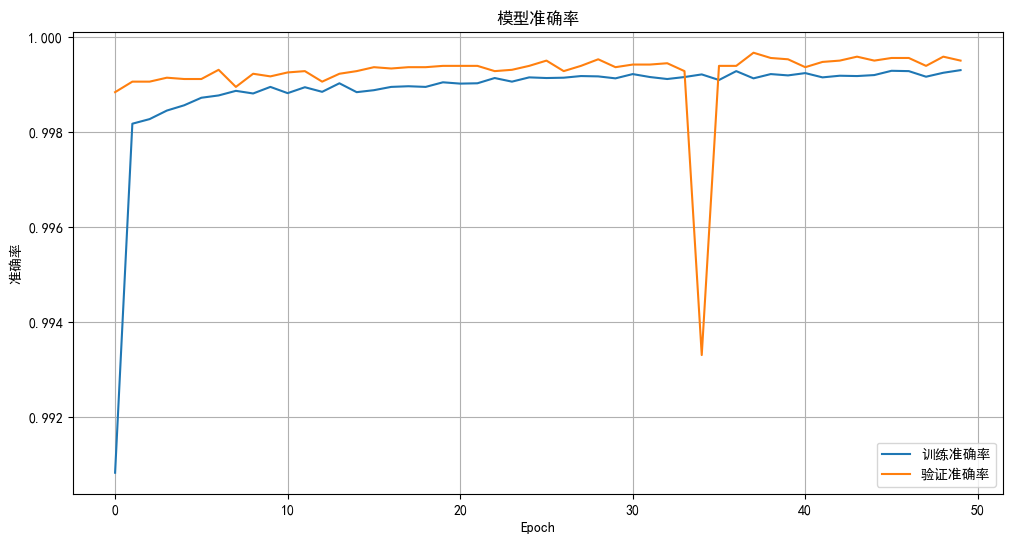

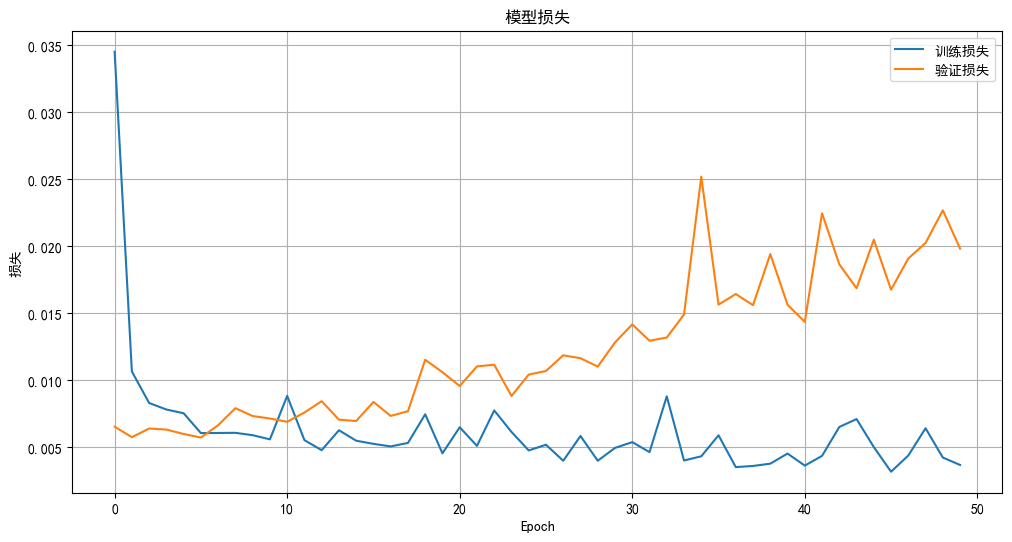

In [35]:
#forget to change picture language sry  yellow is training data 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font to SimHei (black body) so that Chinese can be displayed normally
plt.rcParams['font.sans-serif'] = ['SimHei']  # Specify default font
plt.rcParams['axes.unicode_minus'] = False  # Solve the problem of negative sign display

# 绘制训练和验证的准确率变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='训练准确率') #training accuracy
plt.plot(history.history['val_accuracy'], label='验证准确率') #Verification accuracy
plt.title('模型准确率') #Model accuracy
plt.xlabel('Epoch')
plt.ylabel('准确率') #Accuracy
plt.legend()
plt.grid(True)
plt.show()

# 绘制训练和验证的损失变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='训练损失') #training loss
plt.plot(history.history['val_loss'], label='验证损失') #Validation loss
plt.title('模型损失') #model loss
plt.xlabel('Epoch')
plt.ylabel('损失') #Loss
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Model evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1413/1413 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19622
           1       1.00      1.00      1.00     25567

    accuracy                           1.00     45189
   macro avg       1.00      1.00      1.00     45189
weighted avg       1.00      1.00      1.00     45189

[[19607    15]
 [   19 25548]]


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build new ANN models
model = Sequential()

# The first layer: 288 neurons, the activation function is sigmoid
model.add(Dense(288, input_dim=X_train.shape[1], activation='sigmoid'))

# Second layer: 64 neurons, activation function is relu
model.add(Dense(64, activation='relu'))

# Output layer: 1 neuron, activation function is sigmoid (for binary classification problems)
model.add(Dense(1, activation='sigmoid'))

# Compile the model, the optimizer is adam, the loss function is binary_crossentropy, and the evaluation index is accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4519/4519 ━━━━━━━━━━━━━━━━━━━━ 4s 731us/step - accuracy: 0.9805 - loss: 0.0543 - val_accuracy: 0.9981 - val_loss: 0.0100
Epoch 2/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 715us/step - accuracy: 0.9981 - loss: 0.0084 - val_accuracy: 0.9989 - val_loss: 0.0074
Epoch 3/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 662us/step - accuracy: 0.9987 - loss: 0.0056 - val_accuracy: 0.9991 - val_loss: 0.0067
Epoch 4/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 658us/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9991 - val_loss: 0.0058
Epoch 5/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 652us/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9995 - val_loss: 0.0053
Epoch 6/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 646us/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0055
Epoch 7/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 663us/step - accuracy: 0.9990 - loss: 0.0027 - val_accuracy: 0.9983 - val_loss: 0.0092
Epoch 8/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 655us/step - accuracy: 0.9992 - loss: 0.00

In [45]:
# Model evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1413/1413 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19622
           1       1.00      1.00      1.00     25567

    accuracy                           1.00     45189
   macro avg       1.00      1.00      1.00     45189
weighted avg       1.00      1.00      1.00     45189

[[19607    15]
 [   12 25555]]


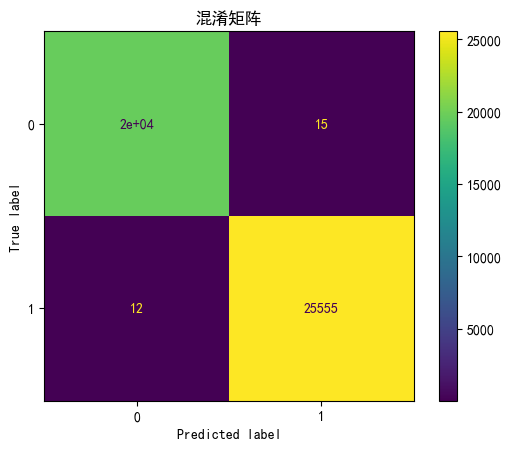

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('混淆矩阵')
plt.show()


In [55]:
#new model
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build an ANN model with added hidden layers
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(48, activation='relu'))  # New hidden layer, 48 neurons
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4519/4519 ━━━━━━━━━━━━━━━━━━━━ 4s 745us/step - accuracy: 0.9487 - loss: 0.1266 - val_accuracy: 0.9988 - val_loss: 0.0085
Epoch 2/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 689us/step - accuracy: 0.9977 - loss: 0.0156 - val_accuracy: 0.9982 - val_loss: 0.0096
Epoch 3/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 750us/step - accuracy: 0.9976 - loss: 0.0126 - val_accuracy: 0.9991 - val_loss: 0.0065
Epoch 4/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 749us/step - accuracy: 0.9985 - loss: 0.0088 - val_accuracy: 0.9992 - val_loss: 0.0058
Epoch 5/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 696us/step - accuracy: 0.9985 - loss: 0.0072 - val_accuracy: 0.9991 - val_loss: 0.0073
Epoch 6/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 725us/step - accuracy: 0.9985 - loss: 0.0094 - val_accuracy: 0.9992 - val_loss: 0.0068
Epoch 7/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 732us/step - accuracy: 0.9984 - loss: 0.0078 - val_accuracy: 0.9992 - val_loss: 0.0070
Epoch 8/50
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 3s 721us/step - accuracy: 0.9986 - loss: 0.00

In [57]:
# Model evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1413/1413 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19622
           1       1.00      1.00      1.00     25567

    accuracy                           1.00     45189
   macro avg       1.00      1.00      1.00     45189
weighted avg       1.00      1.00      1.00     45189

[[19607    15]
 [   15 25552]]


In [ ]:
#summary!!!!!!!!!!!!!!!!!----------------

In [ ]:
'''
After correcting the dataset it seems to be correct
1. Original model   
    False Positive = 15
    False Negative = 19
    Accuracy ≈ 9994025094602669
    Error Rate ≈ 0.0752%
    
2. Modify the model of hidden layers and parameters
    False Positive = 15
    False Negative = 15
    Accuracy ≈ 99.93%
    Error Rate ≈ 0.0664%。
    
3. The best model based on the original model
    False Positive = 15
    False Negative = 12
    Accuracy ≈ 99.94 %
    Error Rate ≈ 0.0597%
